In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
 

In [49]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing numerical values with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median ({median_val})")

# Fill missing categorical values with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode ('{mode_val}')")

Filled missing values in 'Age' with median (28.0)
Filled missing values in 'Cabin' with mode ('B96 B98')
Filled missing values in 'Embarked' with mode ('S')


C:\Users\PUNIT AYARE\AppData\Local\Temp\ipykernel_2740\386862396.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\PUNIT AYARE\AppData\Local\Temp\ipykernel_2740\386862396.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [53]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [55]:
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
        print(f"✅ Label encoded '{col}'")

✅ Label encoded 'Sex'
✅ Label encoded 'Embarked'


In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


In [57]:
scaler = MinMaxScaler()


df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [58]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,B96 B98,2


In [59]:
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,0.271174,1,0,A/5 21171,0.014151,2
1,2,1,1,0,0.472229,1,0,PC 17599,0.139136,0
2,3,1,3,0,0.321438,0,0,STON/O2. 3101282,0.015469,2
3,4,1,1,0,0.434531,1,0,113803,0.103644,2
4,5,0,3,1,0.434531,0,0,373450,0.015713,2


In [61]:
df.drop('Ticket', axis=1, inplace=True)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,1,0,0.014151,2
1,2,1,1,0,0.472229,1,0,0.139136,0
2,3,1,3,0,0.321438,0,0,0.015469,2
3,4,1,1,0,0.434531,1,0,0.103644,2
4,5,0,3,1,0.434531,0,0,0.015713,2


In [ ]:
df.drop('PassengerId', axis=1, inplace=True)


In [64]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2


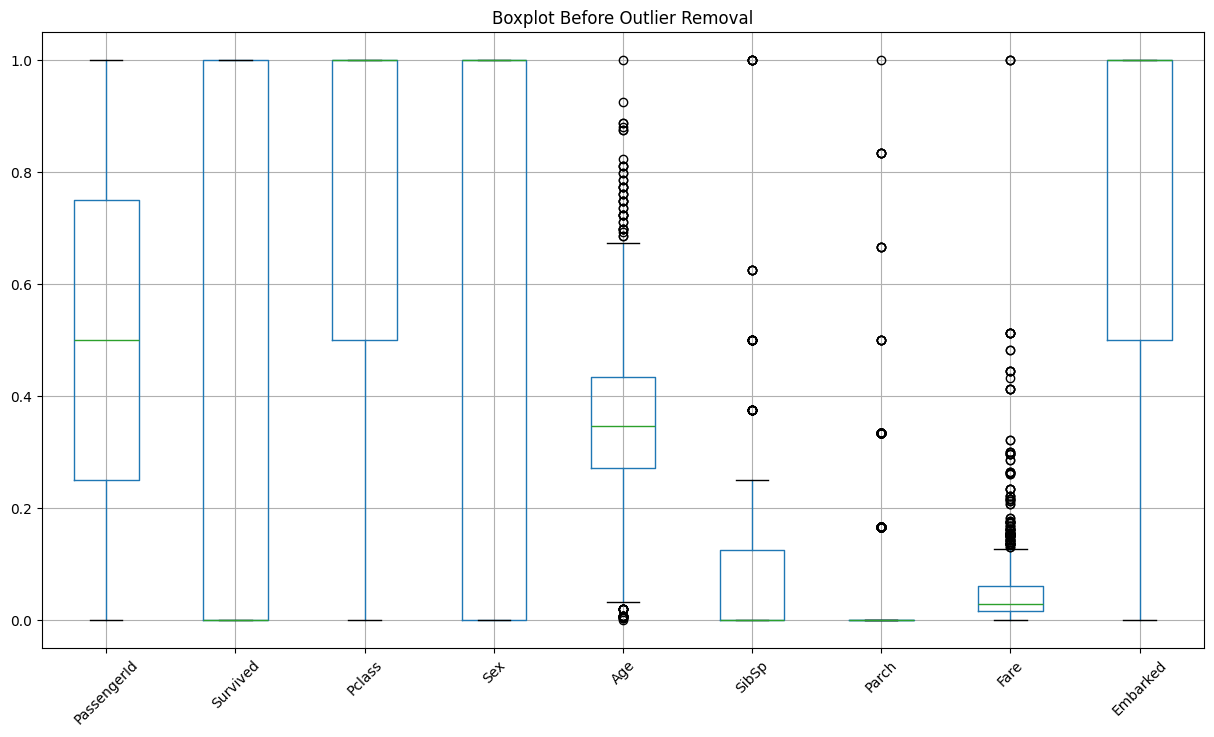


✅ Removed outliers using IQR method.
Original shape: (891, 12), New shape: (577, 12)


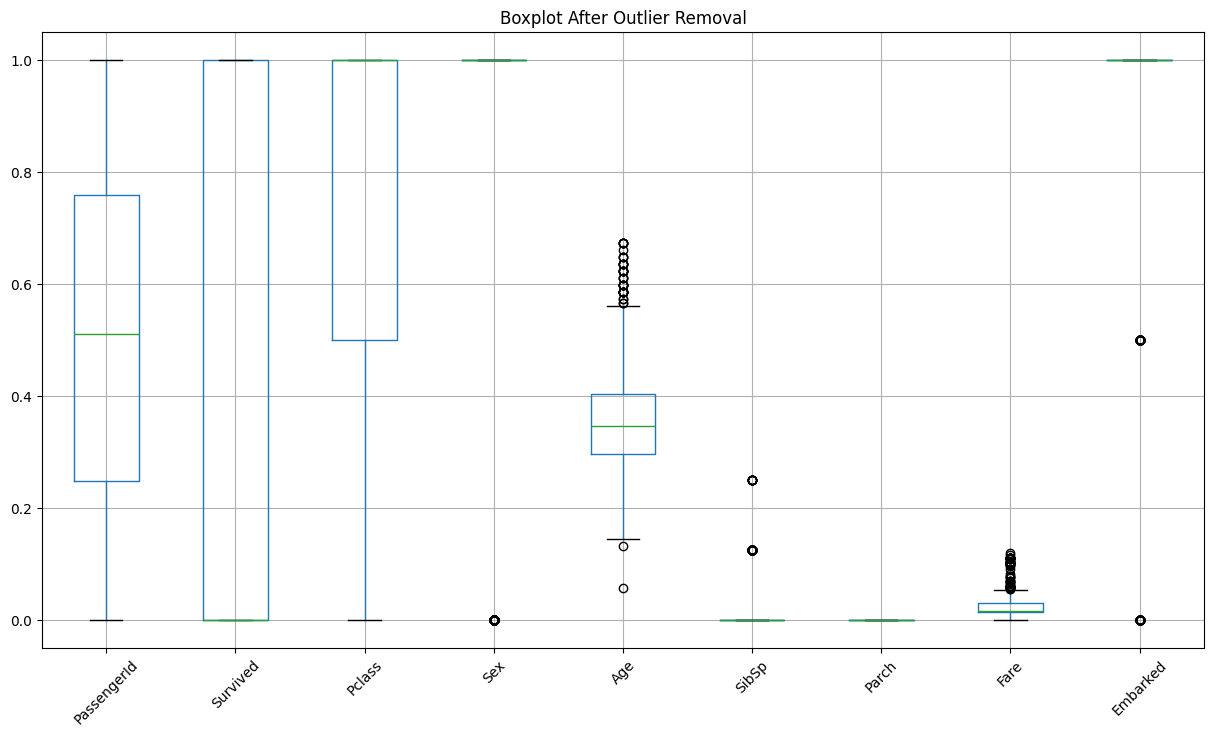

In [ ]:

plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title("Boxplot Before Outlier Removal")
plt.xticks(rotation=45)
plt.show()


# Step 7: Remove Outliers (IQR Method)

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | 
                      (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\n✅ Removed outliers using IQR method.")
print(f"Original shape: {df.shape}, New shape: {df_no_outliers.shape}")


# Step 8: Visualize Outliers (After Removal)

plt.figure(figsize=(15, 8))
df_no_outliers[num_cols].boxplot()
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

In [65]:
df.to_csv("titanic_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as titanic_cleaned.csv")


✅ Cleaned dataset saved as titanic_cleaned.csv
